In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing values

<Axes: xlabel='age', ylabel='charges'>

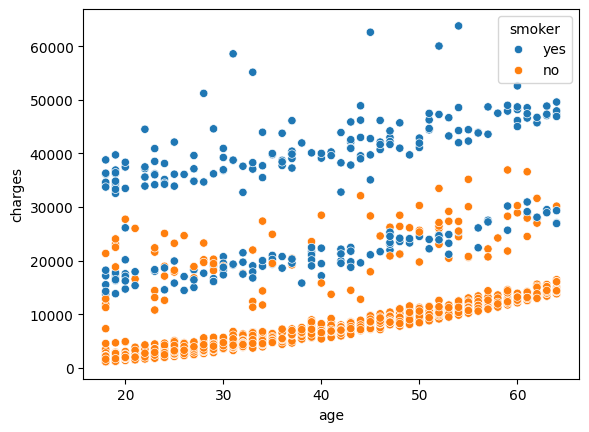

In [5]:
sns.scatterplot(x="age",y="charges",data=df,hue="smoker")

Charges for smokers (blue dots):
Generally higher across all age groups compared to non-smokers.
There's a noticeable trend that as age increases, the charges for smokers also increase, with several individuals having extremely high insurance charges (over $40,000) even in younger age groups (e.g., around age 20 to 30).

Charges for non-smokers (orange dots):
Much lower than those for smokers, even at older ages.
The trend also shows an increase in charges with age, but the rate is significantly slower than for smokers.

Clear separation between smokers and non-smokers:
Smokers consistently incur higher charges than non-smokers at every age group, indicating that smoking is a major factor contributing to higher insurance costs.

<Axes: xlabel='smoker', ylabel='charges'>

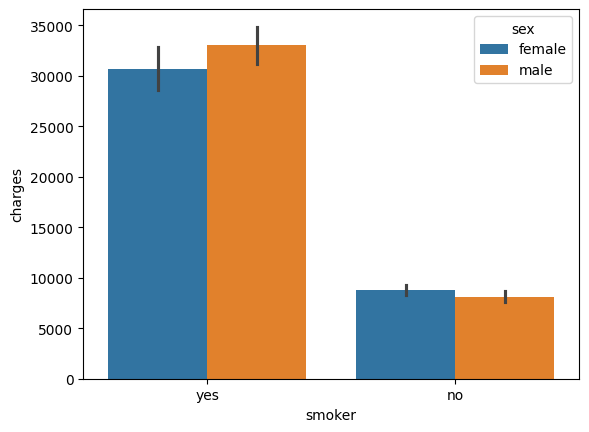

In [6]:
sns.barplot(x="smoker",y="charges",data=df,hue="sex")

<Axes: xlabel='region', ylabel='charges'>

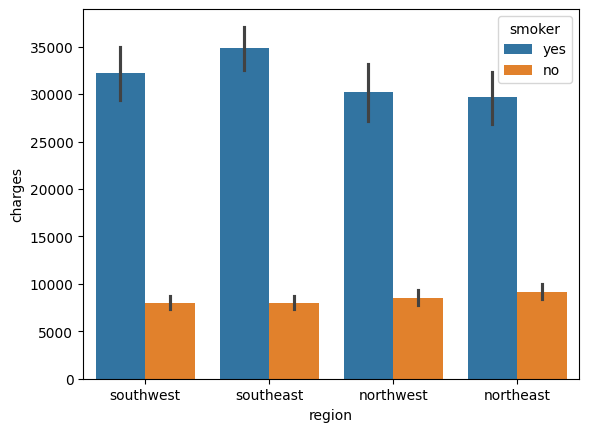

In [7]:
sns.barplot(x="region",y="charges",data=df,hue="smoker")

<Axes: xlabel='region', ylabel='count'>

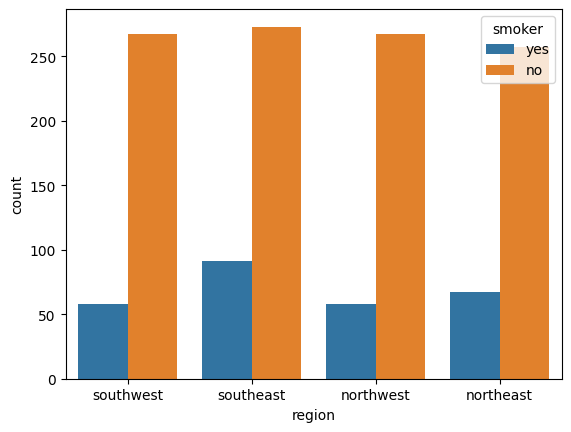

In [8]:
sns.countplot(x="region",data=df,hue="smoker")

<Axes: xlabel='smoker', ylabel='count'>

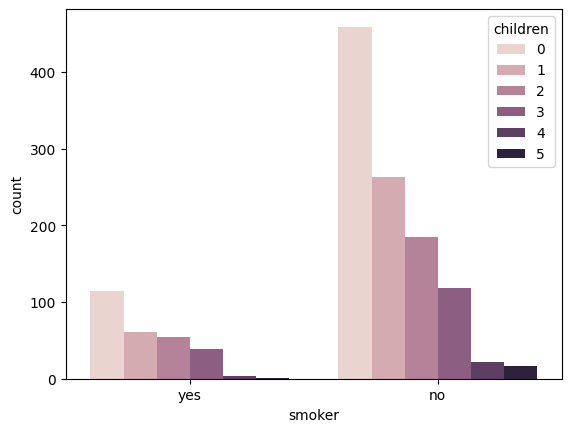

In [9]:
sns.countplot(x="smoker",data=df,hue="children")

<Axes: xlabel='bmi', ylabel='charges'>

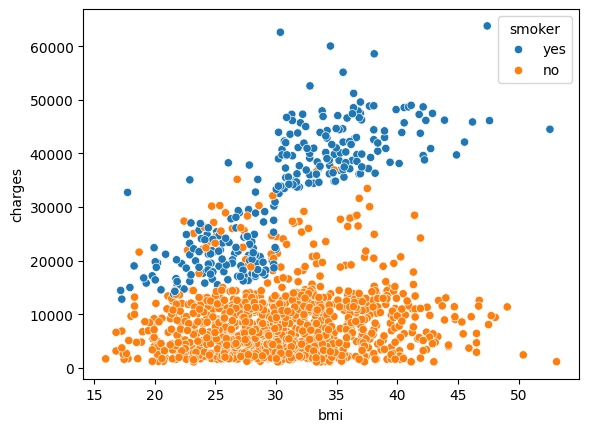

In [10]:
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker")

In [11]:
#label encoding the sex,smoker and region column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])

In [12]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df["smoker"]=le.fit_transform(df["smoker"])

In [14]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df["region"]=le.fit_transform(df["region"])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [18]:
#feature scale age and BMI
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[["age","bmi"]]=sc.fit_transform(df[["age","bmi"]])

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,0,1,3,16884.92400
1,-1.509965,1,0.509621,1,0,2,1725.55230
2,-0.797954,1,0.383307,3,0,2,4449.46200
3,-0.441948,1,-1.305531,0,0,1,21984.47061
4,-0.513149,1,-0.292556,0,0,1,3866.85520


In [20]:
#charges: dependent feature
#age, sex, bmi, children, smoker, region : independent features

x = df.drop("charges",axis=1)
y = df["charges"]

In [21]:
models = []
scores = []

In [22]:
#Linear regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
res= cross_val_score(lr,x,y,cv=5)
models.append("Linear Regression")
scores.append(res.mean())
res.mean()

0.7472559473580954

In [23]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
res= cross_val_score(dt,x,y,cv=5)
models.append("Decision Tree")
scores.append(res.mean())
res.mean()

0.8491272931303661

In [24]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,max_depth=4, max_features=2)
res= cross_val_score(rf,x,y,cv=5)
models.append("Random Forest")
scores.append(res.mean())
res.mean()

0.7895985003631607

In [25]:
#Bagging with Decision Tree
from sklearn.ensemble import BaggingRegressor
dt1 = DecisionTreeRegressor(max_depth=4)
bg = BaggingRegressor(dt1,100)
res= cross_val_score(bg,x,y,cv=5)
models.append("Bagging Classifier with CART")
scores.append(res.mean())
res.mean()

0.8575434670187748

In [26]:
#XGBoost
from xgboost import XGBRegressor
xg = XGBRegressor()
res= cross_val_score(xg,x,y,cv=5)
models.append("XGBOOST")
scores.append(res.mean())
res.mean()

0.8058157367038425

In [27]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor(n_estimators=100)
res= cross_val_score(ad,x,y,cv=5)
models.append("AdaBoost")
scores.append(res.mean())
res.mean()

0.8215902219580826

In [28]:
d1 = {"models":models,"Scores":scores}
df_perform = pd.DataFrame(d1)
df_perform

,models,Scores
0,Linear Regression,0.747256
1,Decision Tree,0.849127
2,Random Forest,0.789599
3,Bagging Classifier with CART,0.857543
4,XGBOOST,0.805816
5,AdaBoost,0.821590
